# ETL Movies:

## Propuesta de trabajo (requerimientos de aprobación)
Transformaciones: Para este MVP no necesitas perfección, ¡necesitas rapidez! ⏩ Vas a hacer estas, y solo estas, transformaciones a los datos:

* 1 Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.✅

* 2 Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.✅

* 3 Los valores nulos del campo release date deben eliminarse.✅

* 4 De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.✅

* 5 Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.✅

* 6 Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.✅

## Librerias necesarias:✅

In [278]:
import pandas as pd
import ast
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

## Ingesta de Datasets:✅

In [279]:
csvs_to_read = [1, 2, 3]
dfs = []
encodings = ['ANSI', 'ANSI', 'UTF-8']

for i, number in enumerate(csvs_to_read):
    df = pd.read_csv(f'D:\Data Scientist\CURSADO HENRY DTS09\PI\PI1_PT02\PI_ML_OPS_PT02\Datasets\Movies_datasets\CSVs Movies\movies_dataset_{number}.csv', encoding=encodings[i], sep=',',low_memory=False)
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_movies = pd.concat(dfs, ignore_index=True)

# Ahora df_movies contiene todos los datos de los tres CSVs en un solo DataFrame

In [280]:
df_movies.shape

(136398, 24)

In [281]:
df_movies.drop_duplicates()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSO,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,FALSO,7.7,5415.0
1,FALSO,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,FALSO,6.9,2413.0
2,FALSO,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,FALSO,6.5,92.0
3,FALSO,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,FALSO,6.1,34.0
4,FALSO,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,FALSO,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136393,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
136394,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
136395,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
136396,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [282]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [283]:
# Configurar opciones de visualización para mostrar todo el contenido sin truncar
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.width', None)        # No truncar la anchura de la visualización
pd.set_option('display.max_colwidth', None) # Mostrar toda la longitud de los valores en las celdas


In [284]:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSO,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,FALSO,7.7,5415.0
1,FALSO,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,FALSO,6.9,2413.0
2,FALSO,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,FALSO,6.5,92.0


In [285]:

# Restablecer opciones de visualización a los valores predeterminados
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

<Axes: >

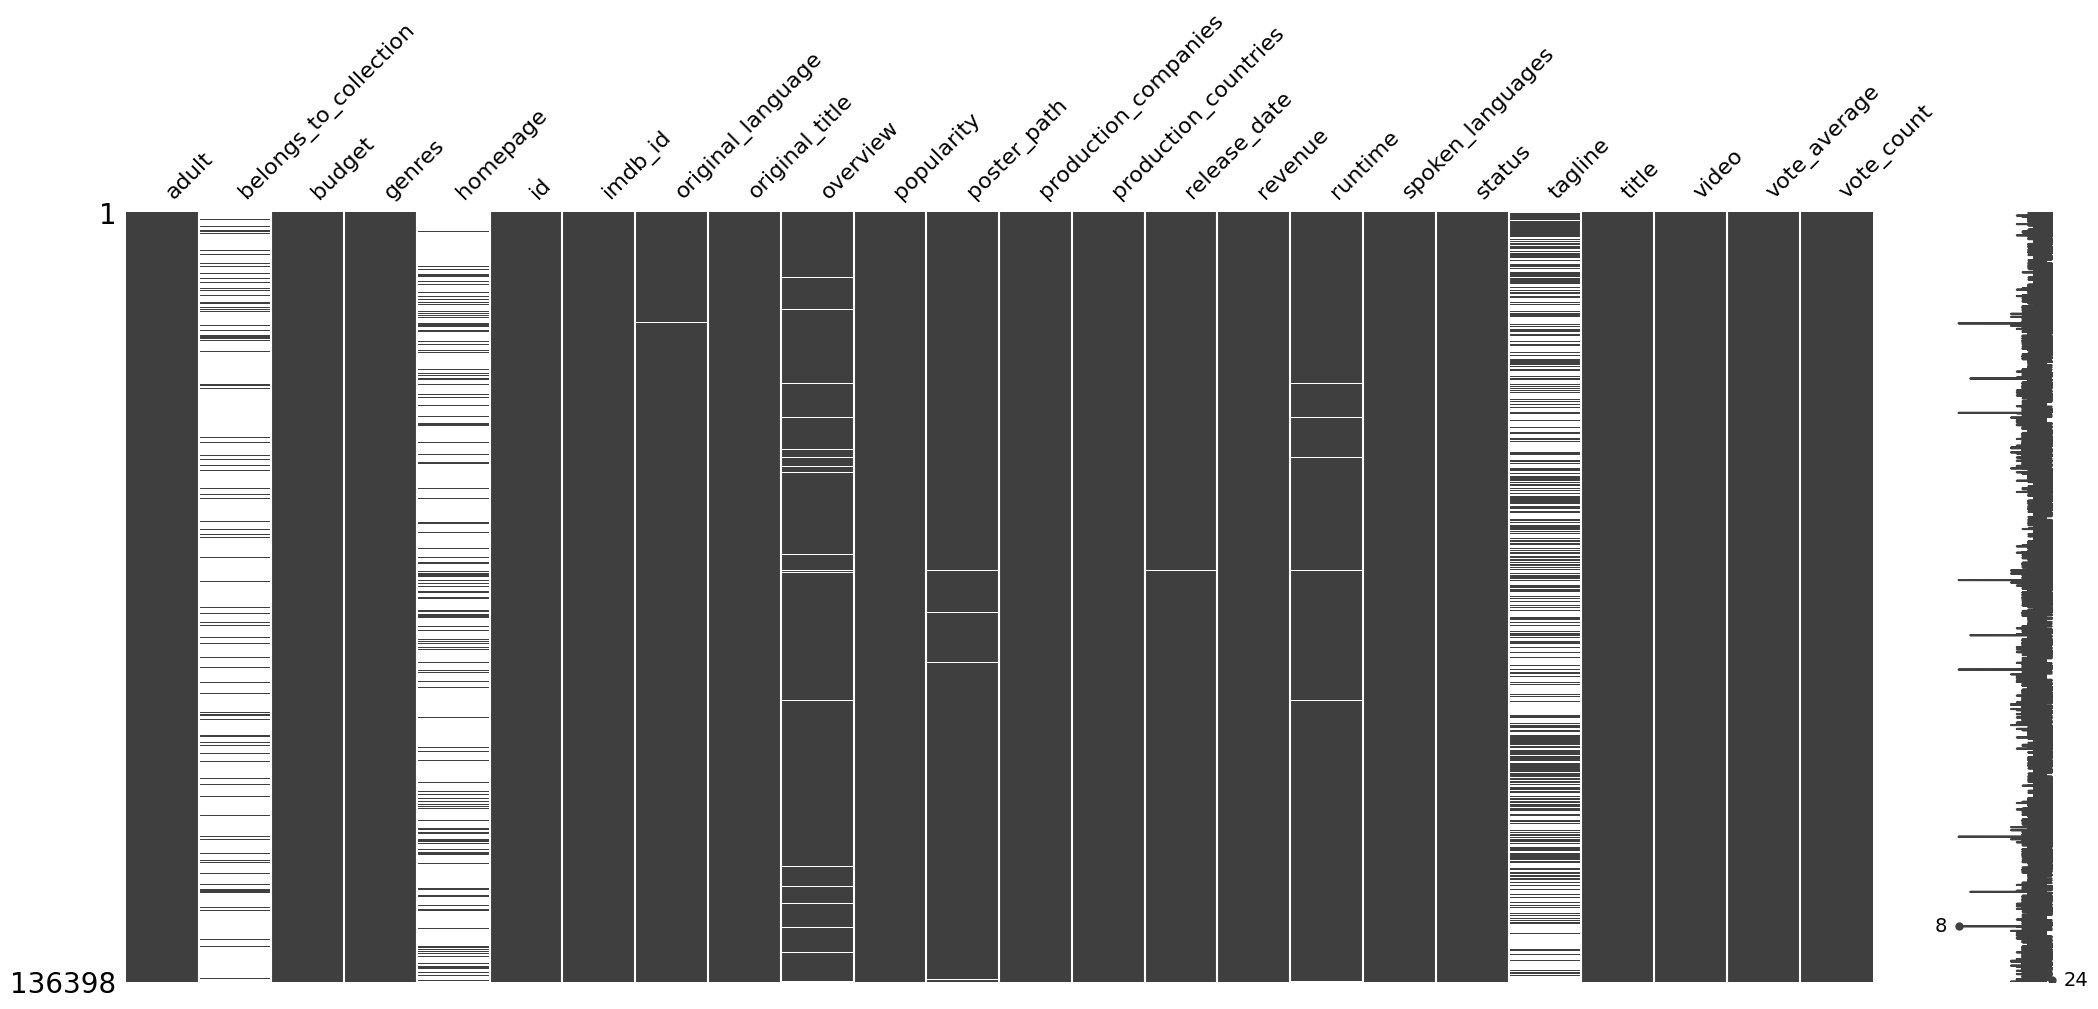

In [286]:
msno.matrix(df_movies)

## Consigna 6 Eliminar las columnas que no serán utilizadas, video, imdb_id, adult, original_title, poster_path y homepage.✅

Descarto ahora para no arrastrarlas en las transformaciones y evitar furuaas confusines.

In [287]:
# Suponiendo que ya tienes el DataFrame df_movies cargado o creado

# Lista de columnas a eliminar
columnas_a_eliminar = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage', 'tagline']

# Utilizamos el método drop() para eliminar las columnas
df_movies = df_movies.drop(columnas_a_eliminar, axis=1)

# Si quieres aplicar los cambios directamente en el DataFrame original sin crear una copia, puedes usar el argumento inplace=True
# df_movies.drop(columnas_a_eliminar, axis=1, inplace=True)


In [288]:
df_movies.isnull().sum()

belongs_to_collection    122916
budget                        0
genres                        0
id                            0
original_language            33
overview                   2872
popularity                   15
production_companies          9
production_countries          9
release_date                261
revenue                      18
runtime                     789
spoken_languages             18
status                      261
title                        18
vote_average                 18
vote_count                   18
dtype: int64

<Axes: >

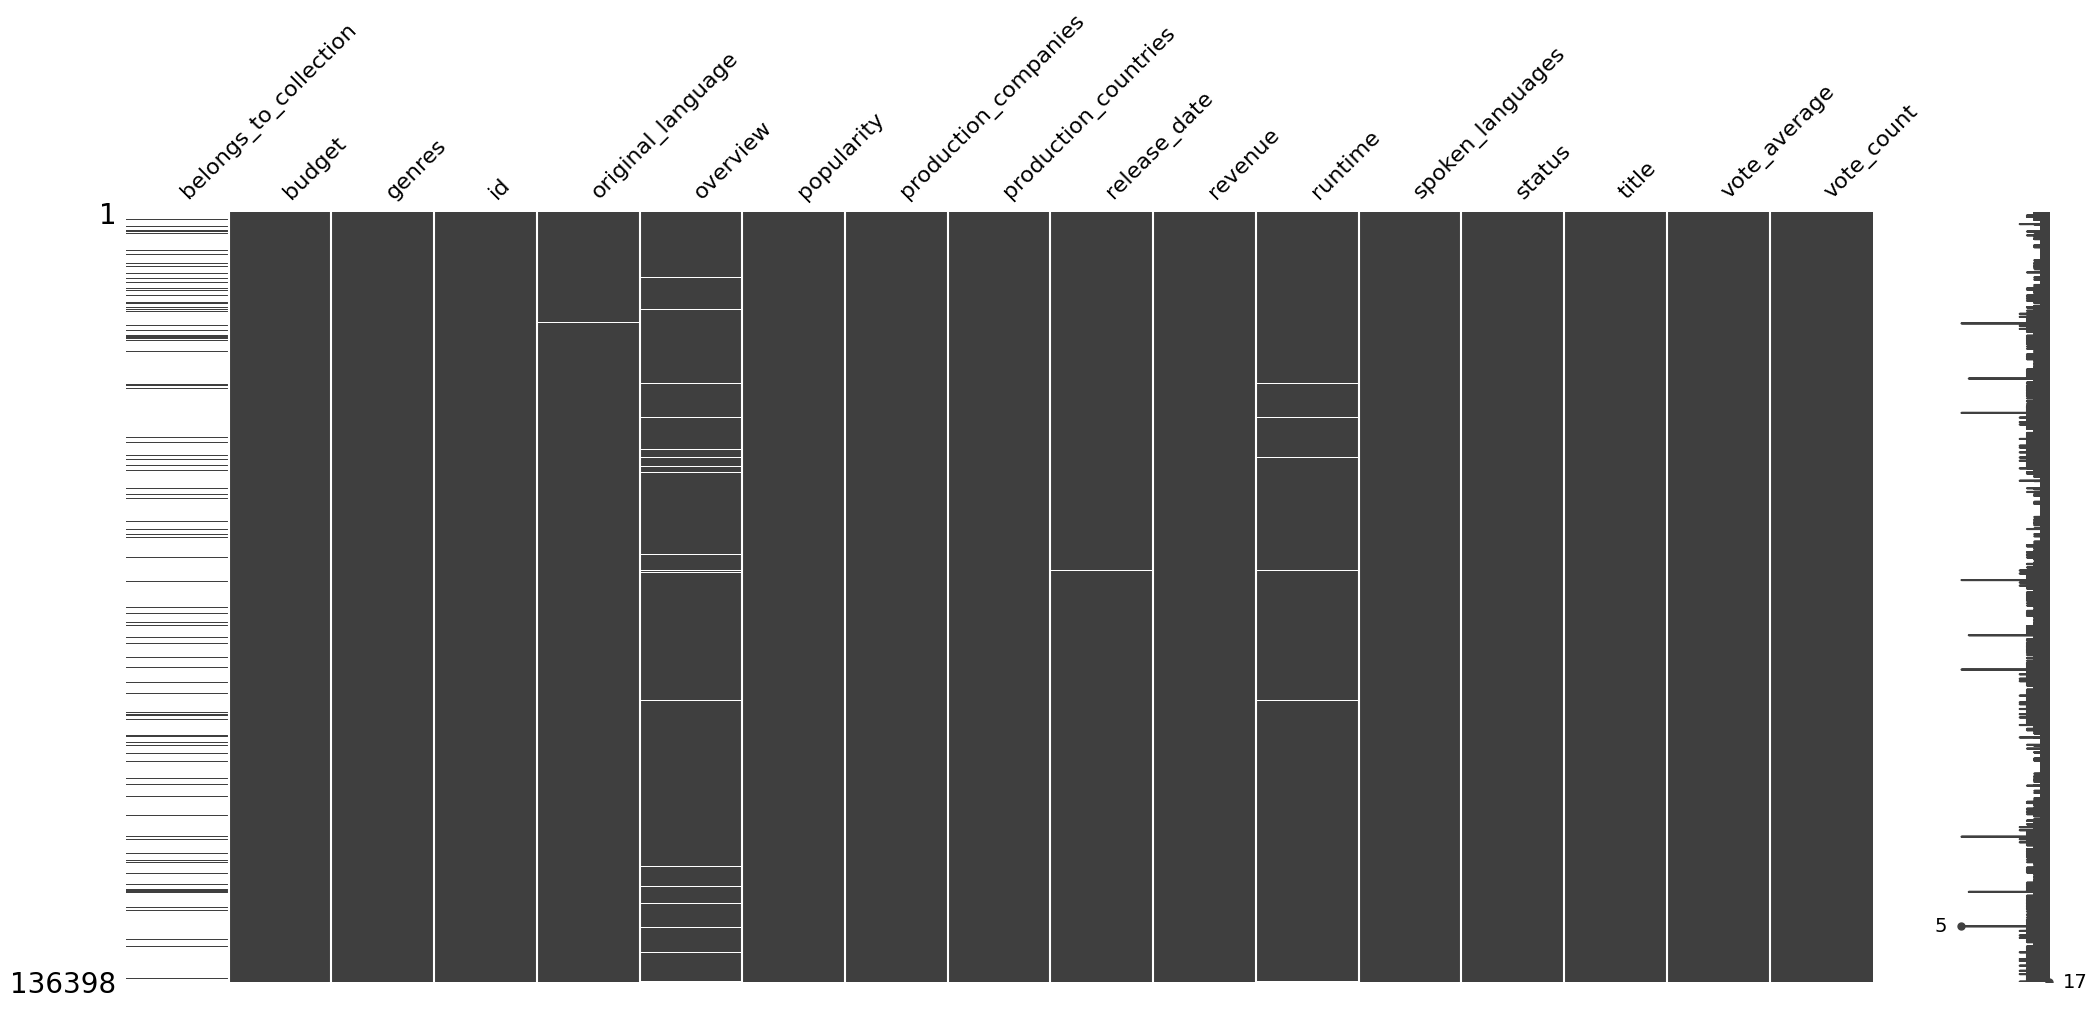

In [289]:
msno.matrix(df_movies)

In [290]:
df_movies.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0


## Estudiando las columnas diccionarios ...✅

### Franquicias Falta ❌

In [291]:
belongs_to_collection_col = df_movies['belongs_to_collection']
belongs_to_collection_id_col = df_movies['id']


In [292]:
belongs_to_collection_col

0         {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                       NaN
2         {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                       NaN
4         {'id': 96871, 'name': 'Father of the Bride Col...
                                ...                        
136393                                                  NaN
136394                                                  NaN
136395                                                  NaN
136396                                                  NaN
136397                                                  NaN
Name: belongs_to_collection, Length: 136398, dtype: object

In [293]:
print(belongs_to_collection_id_col)

0            862
1           8844
2          15602
3          31357
4          11862
           ...  
136393    439050
136394    111109
136395     67758
136396    227506
136397    461257
Name: id, Length: 136398, dtype: object


In [294]:
iteracion = 0
df_belong_to_collection_cleaned = pd.DataFrame()
fallos = 0

for row in belongs_to_collection_col:
    # Obtener el valor de la columna 'crew' del primer registro
    collection_string = belongs_to_collection_col.iloc[iteracion]


    # Check if the value is NaN, skip the iteration if it is
    if pd.notna(collection_string):
        # Convert the string to a dictionary using ast.literal_eval
        data_dict = ast.literal_eval(collection_string)

        # Convert the dictionary to a DataFrame
        df_collection = pd.DataFrame([data_dict])

        # Use the 'iteracion' variable to fill the 'id' column in the DataFrame
        df_collection['id'] = belongs_to_collection_id_col[iteracion]

        # Unify the DataFrames using concat
        df_belong_to_collection_cleaned = pd.concat([df_belong_to_collection_cleaned, df_collection], ignore_index=True)
    
        iteracion += 1
    
    else:
        fallos += 1
        iteracion += 1

print(df_belong_to_collection_cleaned)

           id                            name  \
0         862            Toy Story Collection   
1       15602       Grumpy Old Men Collection   
2       11862  Father of the Bride Collection   
3         710           James Bond Collection   
4       21032                Balto Collection   
...       ...                             ...   
13477   24568         The Carry On Collection   
13478   19307         The Carry On Collection   
13479   21251         The Carry On Collection   
13480  460135  DC Super Hero Girls Collection   
13481  182030            Red Lotus Collection   

                            poster_path                     backdrop_path   0  
0      /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg  /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg NaN  
1      /nLvUdqgPgm3F85NMCii9gVFUcet.jpg  /hypTnLot2z8wpFS7qwsQHW1uV8u.jpg NaN  
2      /nts4iOmNnq7GNicycMJ9pSAn204.jpg  /7qwE57OVZmMJChBpLEbJEmzUydk.jpg NaN  
3       /HORpg5CSkmeQlAolx3bKMrKgfi.jpg  /6VcVl48kNKvdXOZfJPdarlUGOsk.jpg NaN  
4      /w0Z

#### Verificacion de etapas belong_to_collection code:

In [295]:
fallos

122916

In [296]:
data_dict

{'id': 200641,
 'name': 'Red Lotus Collection',
 'poster_path': '/yf9Eod9ANXyHTzDpAxz9ezgvlL4.jpg',
 'backdrop_path': '/3fhHbLeO3DqdHvgHg5szs399eBb.jpg'}

In [297]:
df_collection

,id,name,poster_path,backdrop_path
0,182030,Red Lotus Collection,/yf9Eod9ANXyHTzDpAxz9ezgvlL4.jpg,/3fhHbLeO3DqdHvgHg5szs399eBb.jpg


In [298]:
belongs_to_collection_id_col

0            862
1           8844
2          15602
3          31357
4          11862
           ...  
136393    439050
136394    111109
136395     67758
136396    227506
136397    461257
Name: id, Length: 136398, dtype: object

In [299]:
type(df_belong_to_collection_cleaned)

pandas.core.frame.DataFrame

In [300]:
df_belong_to_collection_cleaned

,id,name,poster_path,backdrop_path,0
0,862,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,NaN
1,15602,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,NaN
2,11862,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,NaN
3,710,James Bond Collection,/HORpg5CSkmeQlAolx3bKMrKgfi.jpg,/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg,NaN
4,21032,Balto Collection,/w0ZgH6Lgxt2bQYnf1ss74UvYftm.jpg,/9VM5LiJV0bGb1st1KyHA3cVnO2G.jpg,NaN
...,...,...,...,...,...
13477,24568,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg,NaN
13478,19307,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg,NaN
13479,21251,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg,NaN
13480,460135,DC Super Hero Girls Collection,None,None,NaN


In [301]:
# Eliminar la última columna con valores NaN
# Opción 2: Usar el método loc
df_belong_to_collection_cleaned = df_belong_to_collection_cleaned.loc[:, ['id', 'name']]


In [302]:
# Assuming df_belong_to_collection_cleaned is your DataFrame
df_belong_to_collection_cleaned.rename(columns={'name': 'collection_name'}, inplace=True)

In [303]:
#verifico :

verifi = df_movies[df_movies['id'] == '21251']

verifi

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45369,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,en,Captain S. Melly takes over as the new Command...,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Carry On England,4.8,15.0
90835,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,en,Captain S. Melly takes over as the new Command...,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Carry On England,4.8,15.0
136301,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,en,Captain S. Melly takes over as the new Command...,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Carry On England,4.8,15.0


In [304]:

# Realizar el left join
df_movies = df_movies.merge(df_belong_to_collection_cleaned, on='id', how='left')

# Supongamos que df es tu DataFrame y quieres eliminar la columna 'column_name'
df_movies.drop('belongs_to_collection', axis=1, inplace=True)


# Mostrar el resultado
df_movies

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,collection_name
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection
1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection
2,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection
3,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,NaN
4,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163411,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,NaN
163412,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,NaN
163413,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0,NaN
163414,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,NaN


### Genres col:

In [305]:
import json
from collections import Counter
import ast
import ast # Módulo para analizar cadenas como literales de Python (necesario para convertir la cadena del diccionario a un diccionario real)

dict_cols = ['genres']

columns_to_separate = pd.DataFrame(df_movies['genres'])
columns_to_separate

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
2,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
3,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
4,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
...,...
163411,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
163412,"[{'id': 18, 'name': 'Drama'}]"
163413,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
163414,[]


In [306]:
# Convertimos la cadena de diccionario a un diccionario real usando ast.literal_eval
columns_to_separate['genres'] = columns_to_separate['genres'].apply(lambda x: ast.literal_eval(x))

# Creamos listas para almacenar los IDs y nombres de género
genre_ids_list = []
genre_names_list = []

# Iteramos a través del DataFrame y extraemos los IDs y nombres de género
for genres_list in columns_to_separate['genres']:
    ids = [genre['id'] for genre in genres_list]
    names = [genre['name'] for genre in genres_list]
    genre_ids_list.append(ids)
    genre_names_list.append(names)

# Creamos un nuevo DataFrame con las listas creadas
new_df = pd.DataFrame({'genre_ids': genre_ids_list, 'genre_names': genre_names_list})

# Unimos los IDs y nombres de género en una sola cadena separada por comas
df_movies['genre_ids'] = new_df['genre_ids'].apply(lambda x: ', '.join(map(str, x)))
df_movies['genre_names'] = new_df['genre_names'].apply(lambda x: ', '.join(x))

print(df_movies.head(10))


     budget                                             genres     id  \
0  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
1  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
2  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
3  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844   
4         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602   
5         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602   
6         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602   
7  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357   
8         0                     [{'id': 35, 'name': 'Comedy'}]  11862   
9         0                     [{'id': 35, 'name': 'Comedy'}]  11862   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  Led by Woody, Andy's toys l

In [307]:
df_movies = df_movies.drop('genres', axis=1)

In [308]:
df_movies

,budget,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,collection_name,genre_ids,genre_names
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family"
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family"
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family"
3,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,NaN,"12, 14, 10751","Adventure, Fantasy, Family"
4,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"10749, 35","Romance, Comedy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163411,0,439050,fa,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,NaN,"18, 10751","Drama, Family"
163412,0,111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,NaN,18,Drama
163413,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0,NaN,"28, 18, 53","Action, Drama, Thriller"
163414,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,NaN,,


In [309]:
#_______________________________________________________________________

### Production_companies col:

In [310]:
dict_cols = ['production_companies']

columns_to_separate = pd.DataFrame(df_movies['production_companies'])
columns_to_separate

,production_companies
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
2,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
3,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
4,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
...,...
163411,[]
163412,"[{'name': 'Sine Olivia', 'id': 19653}]"
163413,"[{'name': 'American World Pictures', 'id': 6165}]"
163414,"[{'name': 'Yermoliev', 'id': 88753}]"


In [311]:
# Paso 1: Manejar los valores 'NaN' en la columna 'production_companies'
df_movies['production_companies'] = df_movies['production_companies'].fillna('[]')

# Paso 2: Convertir la cadena de diccionario a un diccionario real usando ast.literal_eval
def parse_production_companies(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_movies['production_companies'] = df_movies['production_companies'].apply(parse_production_companies)

# Paso 3: Extraer la información del diccionario y crear dos nuevas listas
ids_list = []
names_list = []

for row in df_movies['production_companies']:
    if isinstance(row, list) and len(row) > 0:  # Verificar que haya una lista válida en la fila
        ids = []
        names = []
        for entry in row:
            if 'id' in entry and 'name' in entry:
                ids.append(str(entry['id']))
                names.append(entry['name'])
        ids_list.append(','.join(ids))
        names_list.append(','.join(names))
    else:
        ids_list.append('NaN')  # O cualquier otro valor predeterminado para indicar datos faltantes
        names_list.append('NaN')

# Paso 4: Crear un nuevo DataFrame con los valores separados por comas en las columnas
df_new = pd.DataFrame({'production_companies_ids': ids_list, 'production_companies_nombres': names_list})

# Unimos los IDs y nombres de género en una sola cadena separada por comas
df_movies['production_companies_ids'] = df_new['production_companies_ids']
df_movies['production_companies_nombres'] = df_new['production_companies_nombres']

print(df_movies.head(10))
# Ver el resultado
print(df_new)


     budget     id original_language  \
0  30000000    862                en   
1  30000000    862                en   
2  30000000    862                en   
3  65000000   8844                en   
4         0  15602                en   
5         0  15602                en   
6         0  15602                en   
7  16000000  31357                en   
8         0  11862                en   
9         0  11862                en   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   
1  Led by Woody, Andy's toys live happily in his ...  21.946943   
2  Led by Woody, Andy's toys live happily in his ...  21.946943   
3  When siblings Judy and Peter discover an encha...  17.015539   
4  A family wedding reignites the ancient feud be...    11.7129   
5  A family wedding reignites the ancient feud be...    11.7129   
6  A family wedding reignites the ancient feud be...    11.7129   
7  Cheated on, mistreat

In [312]:
df_movies = df_movies.drop('production_companies', axis=1)

In [313]:
df_movies

,budget,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios
3,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559,2550,10201","TriStar Pictures,Teitler Film,Interscope Commu..."
4,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"10749, 35","Romance, Comedy","6194,19464","Warner Bros.,Lancaster Gate"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163411,0,439050,fa,Rising and falling between a man and woman.,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,NaN,"18, 10751","Drama, Family",NaN,NaN
163412,0,111109,tl,An artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,NaN,18,Drama,19653,Sine Olivia
163413,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0,NaN,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures
163414,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,NaN,,,88753,Yermoliev


In [314]:
#_______________________________________________________________________

### Production_countries col:

In [315]:
dict_cols = ['production_countries']

columns_to_separate = pd.DataFrame(df_movies['production_countries'])
columns_to_separate

,production_countries
0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1,"[{'iso_3166_1': 'US', 'name': 'United States o..."
2,"[{'iso_3166_1': 'US', 'name': 'United States o..."
3,"[{'iso_3166_1': 'US', 'name': 'United States o..."
4,"[{'iso_3166_1': 'US', 'name': 'United States o..."
...,...
163411,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]"
163412,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]"
163413,"[{'iso_3166_1': 'US', 'name': 'United States o..."
163414,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]"


In [316]:
# Paso 1: Manejar los valores 'NaN' en la columna 'production_countries'
df_movies['production_countries'] = df_movies['production_countries'].fillna('[]')

# Paso 2: Convertir la cadena de diccionario a un diccionario real usando ast.literal_eval
def parse_production_countries(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_movies['production_countries'] = df_movies['production_countries'].apply(parse_production_countries)

# Paso 3: Extraer la información del diccionario y crear dos nuevas listas
iso_list = []
names_list = []

for row in df_movies['production_countries']:
    if isinstance(row, list) and len(row) > 0:  # Verificar que haya una lista válida en la fila
        isos = []
        names = []
        for entry in row:
            if 'iso_3166_1' in entry and 'name' in entry:
                isos.append(entry['iso_3166_1'])
                names.append(entry['name'])
        iso_list.append(','.join(isos))
        names_list.append(','.join(names))
    else:
        iso_list.append('NaN')  # O cualquier otro valor predeterminado para indicar datos faltantes
        names_list.append('NaN')

# Paso 4: Crear un nuevo DataFrame con los valores separados por comas en las columnas
df_new = pd.DataFrame({'iso_codes': iso_list, 'country_names': names_list})

# Unimos los códigos ISO y nombres de país en una sola cadena separada por comas
df_movies['iso_codes'] = df_new['iso_codes']
df_movies['country_names'] = df_new['country_names']

# Imprimimos el resultado
print(df_movies.head(10))


     budget     id original_language  \
0  30000000    862                en   
1  30000000    862                en   
2  30000000    862                en   
3  65000000   8844                en   
4         0  15602                en   
5         0  15602                en   
6         0  15602                en   
7  16000000  31357                en   
8         0  11862                en   
9         0  11862                en   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   
1  Led by Woody, Andy's toys live happily in his ...  21.946943   
2  Led by Woody, Andy's toys live happily in his ...  21.946943   
3  When siblings Judy and Peter discover an encha...  17.015539   
4  A family wedding reignites the ancient feud be...    11.7129   
5  A family wedding reignites the ancient feud be...    11.7129   
6  A family wedding reignites the ancient feud be...    11.7129   
7  Cheated on, mistreat

In [317]:
df_movies = df_movies.drop('production_countries', axis=1)

In [318]:
df_movies['country_names'].head(30)

0                          United States of America
1                          United States of America
2                          United States of America
3                          United States of America
4                          United States of America
5                          United States of America
6                          United States of America
7                          United States of America
8                          United States of America
9                          United States of America
10                         United States of America
11                         United States of America
12                 Germany,United States of America
13                         United States of America
14                         United States of America
15          United Kingdom,United States of America
16          United Kingdom,United States of America
17          United Kingdom,United States of America
18                         United States of America
19          

In [319]:
#___________________________________________________________________

### Spoken_lenguages col:

In [320]:
dict_cols = ['spoken_languages']

columns_to_separate = pd.DataFrame(df_movies['spoken_languages'])
columns_to_separate

,spoken_languages
0,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,"[{'iso_639_1': 'en', 'name': 'English'}]"
2,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
4,"[{'iso_639_1': 'en', 'name': 'English'}]"
...,...
163411,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
163412,"[{'iso_639_1': 'tl', 'name': ''}]"
163413,"[{'iso_639_1': 'en', 'name': 'English'}]"
163414,[]


In [321]:
# Paso 1: Manejar los valores 'NaN' en la columna 'spoken_languages'
df_movies['spoken_languages'] = df_movies['spoken_languages'].fillna('[]')

# Paso 2: Convertir la cadena de diccionario a un diccionario real usando ast.literal_eval
def parse_spoken_languages(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_movies['spoken_languages'] = df_movies['spoken_languages'].apply(parse_spoken_languages)

# Paso 3: Extraer la información del diccionario y crear dos nuevas listas
iso_list = []
language_names_list = []

for row in df_movies['spoken_languages']:
    if isinstance(row, list) and len(row) > 0:  # Verificar que haya una lista válida en la fila
        isos = []
        language_names = []
        for entry in row:
            if 'iso_639_1' in entry and 'name' in entry:
                isos.append(entry['iso_639_1'])
                language_names.append(entry['name'])
        iso_list.append(','.join(isos))
        language_names_list.append(','.join(language_names))
    else:
        iso_list.append('NaN')  # O cualquier otro valor predeterminado para indicar datos faltantes
        language_names_list.append('NaN')

# Paso 4: Crear un nuevo DataFrame con los valores separados por comas en las columnas
df_new = pd.DataFrame({'iso_language_codes': iso_list, 'language_names': language_names_list})

# Unimos los códigos ISO y nombres de idioma en una sola cadena separada por comas
df_movies['iso_language_codes'] = df_new['iso_language_codes']
df_movies['language_names'] = df_new['language_names']

# Imprimimos el resultado
print(df_movies.head(10))


     budget     id original_language  \
0  30000000    862                en   
1  30000000    862                en   
2  30000000    862                en   
3  65000000   8844                en   
4         0  15602                en   
5         0  15602                en   
6         0  15602                en   
7  16000000  31357                en   
8         0  11862                en   
9         0  11862                en   

                                            overview popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   1995-10-30   
1  Led by Woody, Andy's toys live happily in his ...  21.946943   1995-10-30   
2  Led by Woody, Andy's toys live happily in his ...  21.946943   1995-10-30   
3  When siblings Judy and Peter discover an encha...  17.015539   1995-12-15   
4  A family wedding reignites the ancient feud be...    11.7129   1995-12-22   
5  A family wedding reignites the ancient feud be...    11.7129   1995-12-22   

In [322]:
df_movies = df_movies.drop('spoken_languages', axis=1)

In [323]:
df_movies[['iso_language_codes','language_names']].head(10)

,iso_language_codes,language_names
0,en,English
1,en,English
2,en,English
3,"en,fr","English,Français"
4,en,English
5,en,English
6,en,English
7,en,English
8,en,English
9,en,English


In [324]:
df_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
3,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,...,2413.0,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559,2550,10201","TriStar Pictures,Teitler Film,Interscope Commu...",US,United States of America,"en,fr","English,Français"
4,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,...,92.0,Grumpy Old Men Collection,"10749, 35","Romance, Comedy","6194,19464","Warner Bros.,Lancaster Gate",US,United States of America,en,English


#### Explorando un poco mas los Spoken languages:

In [325]:
listado_df = pd.DataFrame({
    'iso_language_codes': df_movies['iso_language_codes'],
    'language_names': df_movies['language_names']
})


In [326]:
listado_df.head()

,iso_language_codes,language_names
0,en,English
1,en,English
2,en,English
3,"en,fr","English,Français"
4,en,English


In [327]:
# Dividir los valores separados por comas en nuevas filas
listado_df['iso_language_codes'] = listado_df['iso_language_codes'].str.split(',')
listado_df['language_names'] = listado_df['language_names'].str.split(',')

# Crear una nueva columna para contar las repeticiones
listado_df['count'] = 1

# Agrupar por los valores únicos en 'iso_language_codes' y 'language_names' y sumar los conteos
result = listado_df.explode('iso_language_codes').explode('language_names').groupby(['iso_language_codes', 'language_names'], as_index=False)['count'].sum()

# Ordenar por la columna 'count' de manera descendente
result = result.sort_values(by='count', ascending=False)

# Mostrar los resultados
print(result)

     iso_language_codes  language_names   count
520                  en         English  105117
784                  fr        Français   14634
0                   NaN             NaN   11955
397                  de         Deutsch    9693
1127                 it        Italiano    8667
...                 ...             ...     ...
2262                 tl         ภาษาไทย       1
1363                 la           Český       1
1365                 la  български език       1
1368                 la          हिन्दी       1
2538                 zu          हिन्दी       1

[2539 rows x 3 columns]


In [328]:
result.tail(5)

,iso_language_codes,language_names,count
2262,tl,ภาษาไทย,1
1363,la,Český,1
1365,la,български език,1
1368,la,हिन्दी,1
2538,zu,हिन्दी,1


## Continue with cleaning:✅

In [329]:
df_movies

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,5415.0,Toy Story Collection,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
3,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,...,2413.0,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559,2550,10201","TriStar Pictures,Teitler Film,Interscope Commu...",US,United States of America,"en,fr","English,Français"
4,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,...,92.0,Grumpy Old Men Collection,"10749, 35","Romance, Comedy","6194,19464","Warner Bros.,Lancaster Gate",US,United States of America,en,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163411,0,439050,fa,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Released,Subdue,...,1.0,NaN,"18, 10751","Drama, Family",NaN,NaN,IR,Iran,fa,فارسی
163412,0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,Century of Birthing,...,3.0,NaN,18,Drama,19653,Sine Olivia,PH,Philippines,tl,
163413,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,Betrayal,...,6.0,NaN,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures,US,United States of America,en,English
163414,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,Satan Triumphant,...,0.0,NaN,,,88753,Yermoliev,RU,Russia,NaN,NaN


In [330]:
df_movies = df_movies.drop_duplicates()

<Axes: >

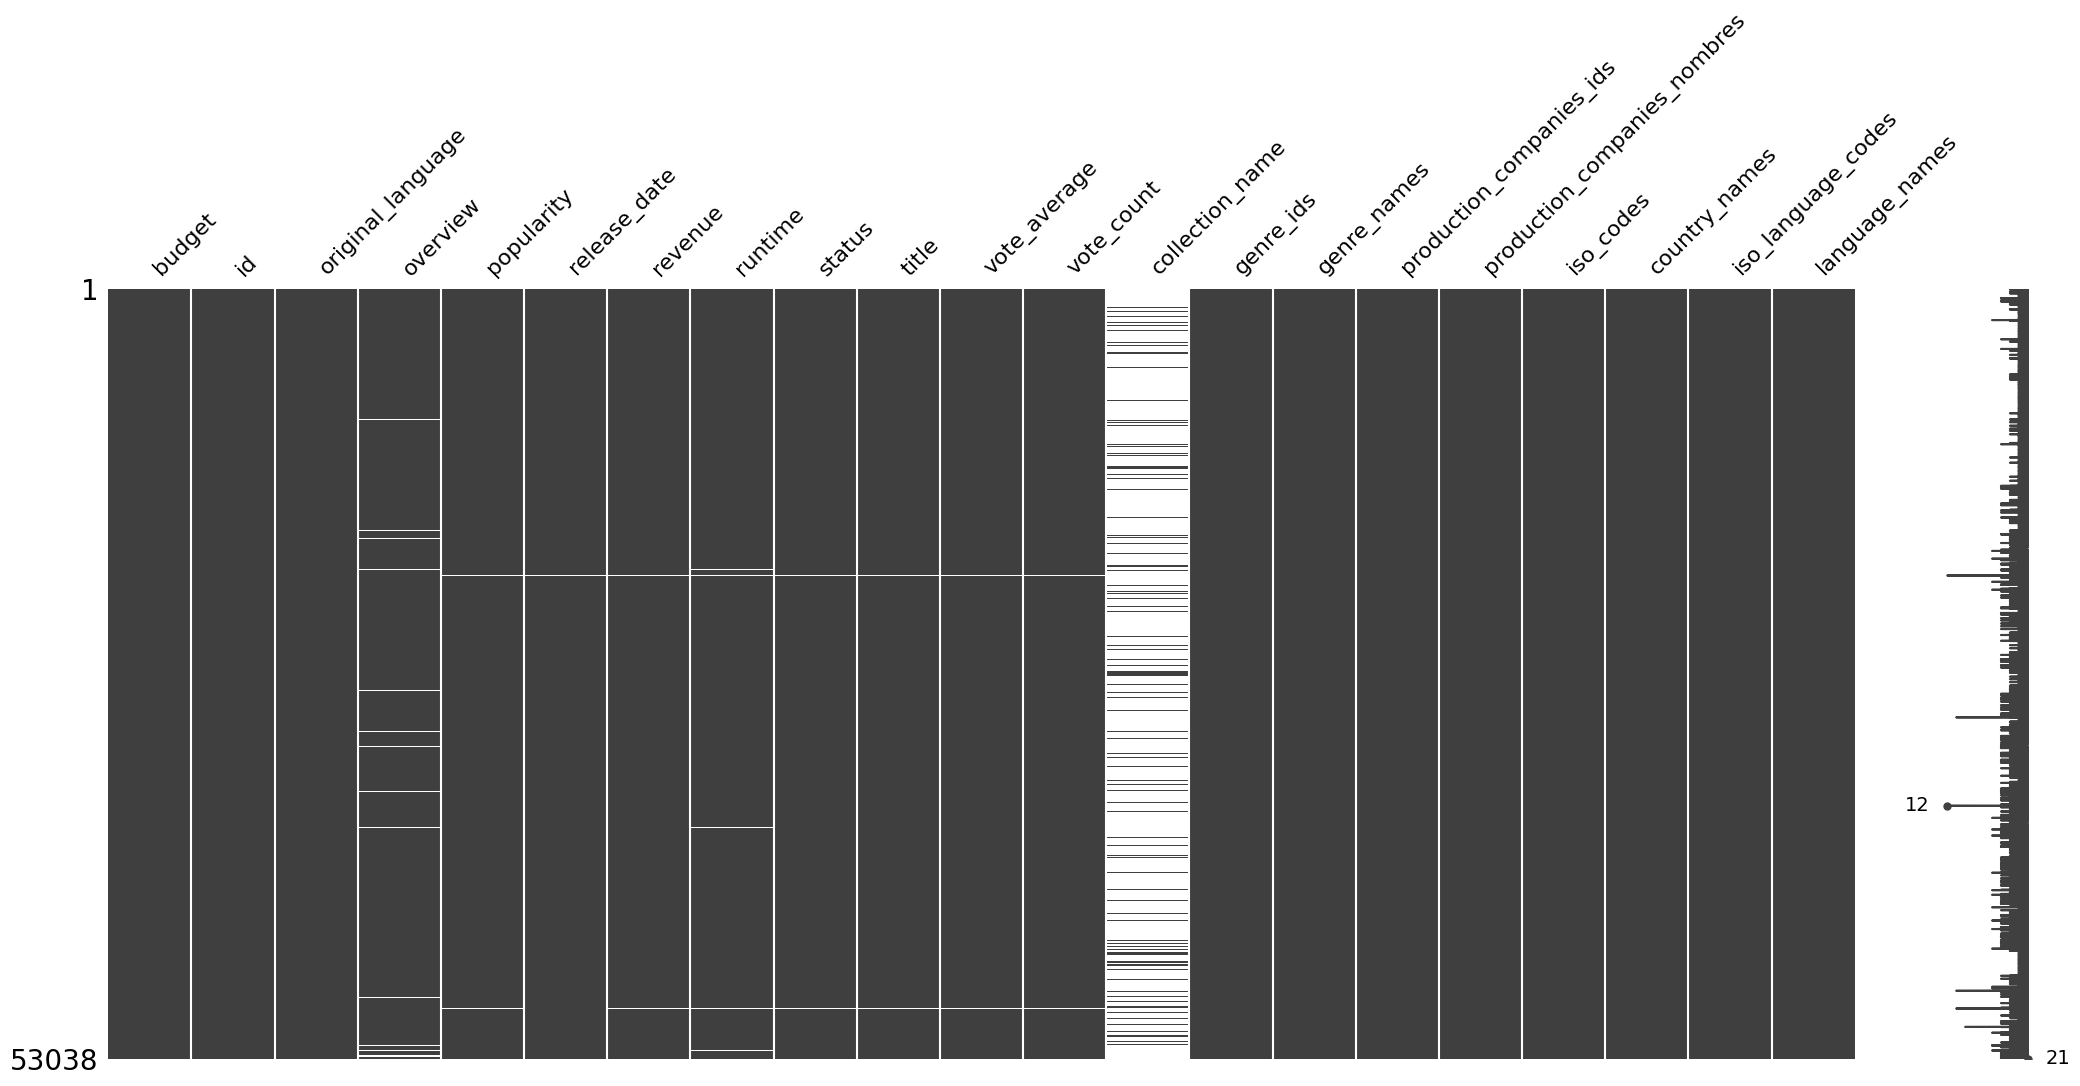

In [331]:
msno.matrix(df_movies)

In [332]:
df_movies.isnull().sum()

budget                              0
id                                  0
original_language                  13
overview                         1088
popularity                          7
release_date                      119
revenue                             9
runtime                           310
status                            106
title                               9
vote_average                        9
vote_count                          9
collection_name                 47431
genre_ids                           0
genre_names                         0
production_companies_ids            0
production_companies_nombres        0
iso_codes                           0
country_names                       0
iso_language_codes                  0
language_names                      0
dtype: int64

### Rescatando algunos valores...

In [333]:
df_movies.loc[:, 'original_language'] = df_movies['original_language'].fillna(df_movies['language_names'])
df_movies.loc[:, 'overview'] = df_movies['overview'].fillna("")
df_movies.loc[:, 'popularity'] = df_movies['popularity'].fillna(0)
df_movies.loc[:, 'release_date'] = df_movies['release_date'].fillna("")
df_movies.loc[:, 'revenue'] = df_movies['revenue'].fillna(0)
df_movies.loc[:, 'runtime'] = df_movies['runtime'].fillna(0)
df_movies.loc[:, 'status'] = df_movies['status'].fillna('Released')
df_movies.loc[:, 'title'] = df_movies['title'].fillna('Unknown')
df_movies.loc[:, 'vote_average'] = df_movies['vote_average'].fillna(0)
df_movies.loc[:, 'vote_count'] = df_movies['vote_count'].fillna(0)
df_movies.loc[:, 'collection_name'] = df_movies['collection_name'].fillna('not part of a collection')

In [334]:
df_movies.isnull().sum()

budget                          0
id                              0
original_language               0
overview                        0
popularity                      0
release_date                    0
revenue                         0
runtime                         0
status                          0
title                           0
vote_average                    0
vote_count                      0
collection_name                 0
genre_ids                       0
genre_names                     0
production_companies_ids        0
production_companies_nombres    0
iso_codes                       0
country_names                   0
iso_language_codes              0
language_names                  0
dtype: int64

_________________________________________________________

## Some previus Transformations for future dtype assignement...✅

In [335]:
# Convert all text data to lower case
df_movies = df_movies.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [336]:
df_movies.head(5)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names
0,30000000,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,released,toy story,...,5415.0,toy story collection,"16, 35, 10751","animation, comedy, family",3,pixar animation studios,us,united states of america,en,english
3,65000000,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,released,jumanji,...,2413.0,not part of a collection,"12, 14, 10751","adventure, fantasy, family","559,2550,10201","tristar pictures,teitler film,interscope commu...",us,united states of america,"en,fr","english,français"
4,0,15602,en,a family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,released,grumpier old men,...,92.0,grumpy old men collection,"10749, 35","romance, comedy","6194,19464","warner bros.,lancaster gate",us,united states of america,en,english
7,16000000,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,released,waiting to exhale,...,34.0,not part of a collection,"35, 18, 10749","comedy, drama, romance",306,twentieth century fox film corporation,us,united states of america,en,english
8,0,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,released,father of the bride part ii,...,173.0,father of the bride collection,35,comedy,"5842,9195","sandollar productions,touchstone pictures",us,united states of america,en,english


In [337]:
# Convert 'budget' column to float, replacing non-numeric values with NaN
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')
df_movies.loc[:, 'budget'] = df_movies['budget'].fillna(0)


In [338]:
df_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names
0,30000000.0,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,released,toy story,...,5415.0,toy story collection,"16, 35, 10751","animation, comedy, family",3,pixar animation studios,us,united states of america,en,english
3,65000000.0,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,released,jumanji,...,2413.0,not part of a collection,"12, 14, 10751","adventure, fantasy, family","559,2550,10201","tristar pictures,teitler film,interscope commu...",us,united states of america,"en,fr","english,français"
4,0.0,15602,en,a family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,released,grumpier old men,...,92.0,grumpy old men collection,"10749, 35","romance, comedy","6194,19464","warner bros.,lancaster gate",us,united states of america,en,english
7,16000000.0,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,released,waiting to exhale,...,34.0,not part of a collection,"35, 18, 10749","comedy, drama, romance",306,twentieth century fox film corporation,us,united states of america,en,english
8,0.0,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,released,father of the bride part ii,...,173.0,father of the bride collection,35,comedy,"5842,9195","sandollar productions,touchstone pictures",us,united states of america,en,english


<Axes: ylabel='budget'>

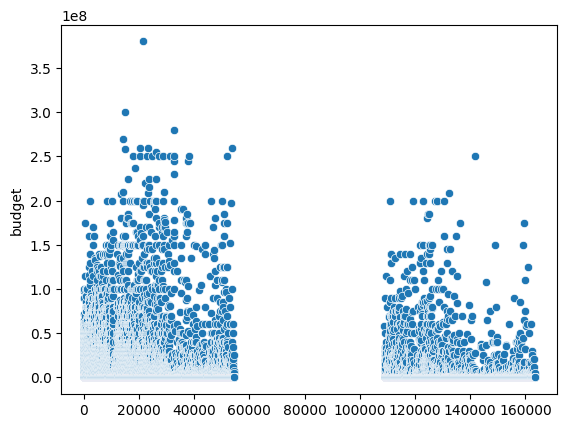

In [339]:
sns.scatterplot(df_movies['budget'])

### To Date format...

In [340]:
# Assuming df_movies is your DataFrame
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], format='%Y-%m-%d', errors='coerce')

# Count the number of errors (non-numeric values) in the 'revenue' column
num_errors = df_movies['revenue'].isna().sum()
df_movies['release_date'] = df_movies['release_date'].dropna()
print(f"Number of errors during coercion: {num_errors}")

Number of errors during coercion: 0


### Por consigna Agregado de columna release_year:

In [341]:
df_movies['release_year'] = df_movies['release_date'].dt.year

### To Numeric...

In [342]:
list_column = ['id','popularity','revenue','runtime','vote_average','vote_count','release_year']
for column in list_column:
    # Assuming df_movies is your DataFrame
    df_movies[column] = pd.to_numeric(df_movies[column], errors='coerce')

    # Count the number of errors (non-numeric values) in the 'revenue' column
    num_errors = df_movies[column].isna().sum()

    if num_errors > 0:
        df_movies[column] = df_movies[column].fillna(0)

    print(f"Number of errors during coercion {column}: {num_errors}")


Number of errors during coercion id: 6
Number of errors during coercion popularity: 2
Number of errors during coercion revenue: 0
Number of errors during coercion runtime: 0
Number of errors during coercion vote_average: 0
Number of errors during coercion vote_count: 0
Number of errors during coercion release_year: 125


__________________________________________________________________________________________

###  Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.✅

In [343]:
## pendiente

df_movies ['return'] = df_movies['revenue']/df_movies['budget']

In [344]:
# Establecer en 0 los valores infinitos (inf) o NaN en una columna específica
columna_a_ajustar = 'return'
df_movies[columna_a_ajustar] = df_movies[columna_a_ajustar].replace([np.inf, np.nan], 0)


In [345]:
df_movies

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,30000000.0,862.0,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,released,toy story,...,"16, 35, 10751","animation, comedy, family",3,pixar animation studios,us,united states of america,en,english,1995.0,12.451801
3,65000000.0,8844.0,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,released,jumanji,...,"12, 14, 10751","adventure, fantasy, family","559,2550,10201","tristar pictures,teitler film,interscope commu...",us,united states of america,"en,fr","english,français",1995.0,4.043035
4,0.0,15602.0,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,released,grumpier old men,...,"10749, 35","romance, comedy","6194,19464","warner bros.,lancaster gate",us,united states of america,en,english,1995.0,0.000000
7,16000000.0,31357.0,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,released,waiting to exhale,...,"35, 18, 10749","comedy, drama, romance",306,twentieth century fox film corporation,us,united states of america,en,english,1995.0,5.090760
8,0.0,11862.0,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,released,father of the bride part ii,...,35,comedy,"5842,9195","sandollar productions,touchstone pictures",us,united states of america,en,english,1995.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163385,0.0,63266.0,en,rainy summer evening... young people are arriv...,0.643625,2010-03-25,0.0,79.0,released,phobos. fear kills,...,"53, 27","thriller, horror","3451,16688,16689","art pictures studio,art pictures group,taska p...",ru,russia,ru,pусский,2010.0,0.000000
163400,0.0,49280.0,fr,a band-leader has arranged seven chairs for th...,1.109068,1900-01-01,0.0,1.0,released,the one-man band,...,"14, 28, 53","fantasy, action, thriller",45867,star film company,fr,france,xx,no language,1900.0,0.000000
163401,0.0,106807.0,fr,a series of fantastical wrestling matches.,0.225432,1900-01-01,0.0,2.0,released,the fat and lean wrestling match,...,"35, 14","comedy, fantasy",7159,star-film,fr,france,xx,no language,1900.0,0.000000
163403,0.0,404604.0,hi,the bliss of a biology teacher’s family life i...,1.559596,2017-07-07,0.0,146.0,released,mom,...,"80, 18, 53","crime, drama, thriller","82459,88831","mad films,third eye pictures",in,india,hi,हिन्दी,2017.0,0.000000


In [346]:
df_movies['return'].mean()

643.9600978291824

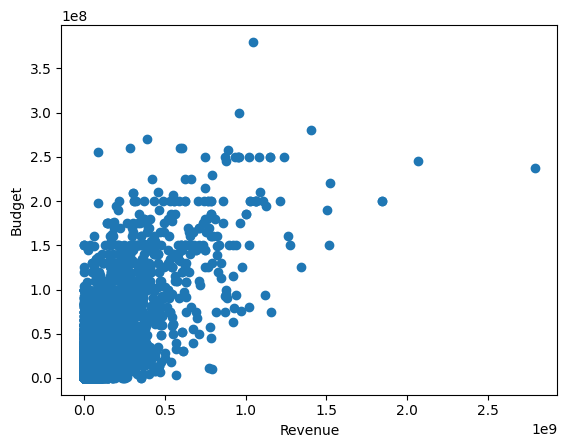

In [347]:
# Set up the figure and axis for the scatter plot
fig, ax = plt.subplots()

# Create the scatter plot
ax.scatter(df_movies['revenue'], df_movies['budget'])

# Set labels for each axis
ax.set_xlabel('Revenue')
ax.set_ylabel('Budget')

# Show the plot
plt.show()

## Asignacion de tipos de dato:✅

In [348]:
# Especificar los tipos de dato para cada columna
data_types = {
    'budget': int,
    'id': int,
    'original_language': str,
    'overview': str,
    'popularity': float,
    'release_date': 'datetime64[ns]',
    'revenue': int,
    'runtime': int,
    'status': str,
    'title': str,
    'vote_average': float,
    'vote_count': int,
    'genre_ids': str,
    'genre_names': str,
    'production_companies_ids': str,
    'production_companies_nombres': str,
    'iso_codes': str,
    'country_names': str,
    'iso_language_codes': str,
    'language_names': str,
    'release_year': int,
    'return': float,
    'collection_name': str
}

# Asignar los tipos de dato al DataFrame
df_movies = df_movies.astype(data_types)

# Imprimir el DataFrame con los tipos de dato actualizados
print(df_movies.dtypes)

budget                                   int32
id                                       int32
original_language                       object
overview                                object
popularity                             float64
release_date                    datetime64[ns]
revenue                                  int32
runtime                                  int32
status                                  object
title                                   object
vote_average                           float64
vote_count                               int32
collection_name                         object
genre_ids                               object
genre_names                             object
production_companies_ids                object
production_companies_nombres            object
iso_codes                               object
country_names                           object
iso_language_codes                      object
language_names                          object
release_year 

## Producto:✅

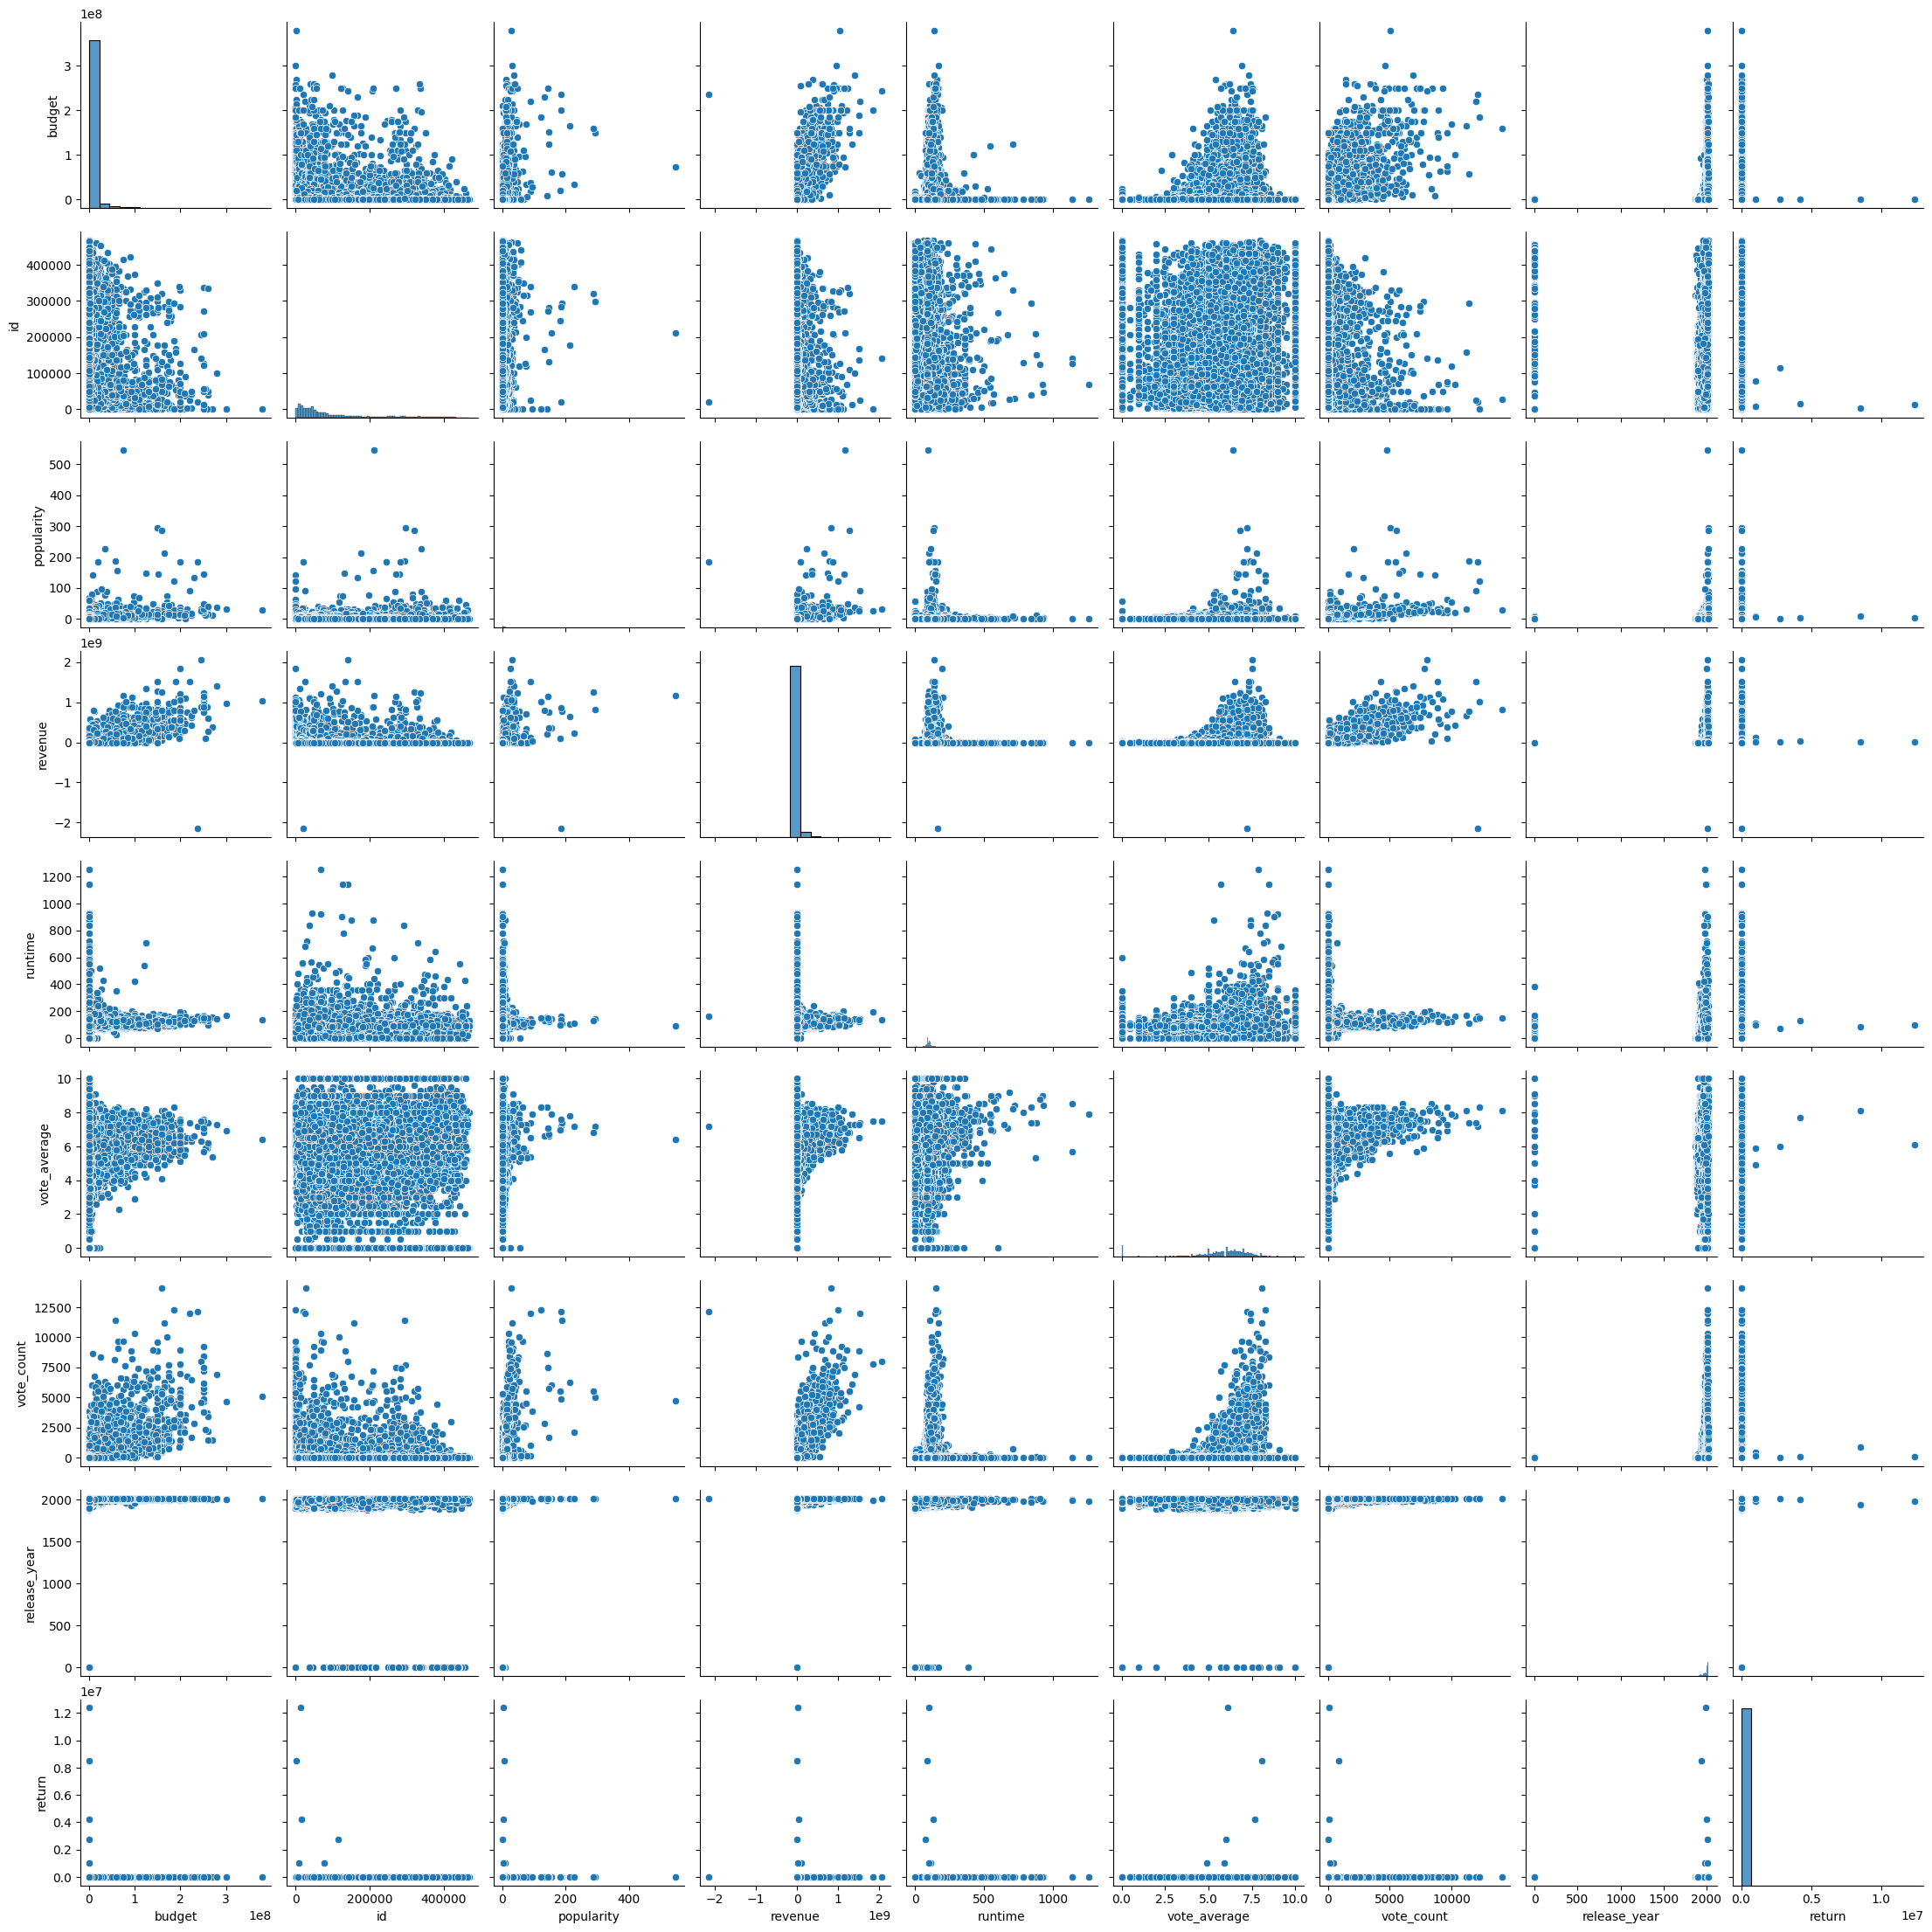

In [349]:
sns.pairplot(df_movies)

In [350]:
df_movies.head(10)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,30000000,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,...,"16, 35, 10751","animation, comedy, family",3,pixar animation studios,us,united states of america,en,english,1995,12.451801
3,65000000,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,...,"12, 14, 10751","adventure, fantasy, family","559,2550,10201","tristar pictures,teitler film,interscope commu...",us,united states of america,"en,fr","english,français",1995,4.043035
4,0,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101,released,grumpier old men,...,"10749, 35","romance, comedy","6194,19464","warner bros.,lancaster gate",us,united states of america,en,english,1995,0.000000
7,16000000,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,waiting to exhale,...,"35, 18, 10749","comedy, drama, romance",306,twentieth century fox film corporation,us,united states of america,en,english,1995,5.090760
8,0,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,father of the bride part ii,...,35,comedy,"5842,9195","sandollar productions,touchstone pictures",us,united states of america,en,english,1995,0.000000
11,60000000,949,en,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170,released,heat,...,"28, 80, 18, 53","action, crime, drama, thriller","508,675,6194","regency enterprises,forward pass,warner bros.",us,united states of america,"en,es","english,español",1995,3.123947
12,58000000,11860,en,an ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0,127,released,sabrina,...,"35, 10749","comedy, romance","4,258,932,5842,14941,55873,58079","paramount pictures,scott rudin productions,mir...","de,us","germany,united states of america","fr,en","français,english",1995,0.000000
13,0,45325,en,"a mischievous young boy, tom sawyer, witnesses...",2.561161,1995-12-22,0,97,released,tom and huck,...,"28, 12, 18, 10751","action, adventure, drama, family",2,walt disney pictures,us,united states of america,"en,de","english,deutsch",1995,0.000000
14,35000000,9091,en,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106,released,sudden death,...,"28, 12, 53","action, adventure, thriller","33,21437,23770","universal pictures,imperial entertainment,sign...",us,united states of america,en,english,1995,1.838576
15,58000000,710,en,james bond must unmask the mysterious head of ...,14.686036,1995-11-16,352194034,130,released,goldeneye,...,"12, 28, 53","adventure, action, thriller","60,7576","united artists,eon productions","gb,us","united kingdom,united states of america","en,ru,es","english,p??????,español",1995,6.072311


In [351]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53038 entries, 0 to 163411
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        53038 non-null  int32         
 1   id                            53038 non-null  int32         
 2   original_language             53038 non-null  object        
 3   overview                      53038 non-null  object        
 4   popularity                    53038 non-null  float64       
 5   release_date                  52913 non-null  datetime64[ns]
 6   revenue                       53038 non-null  int32         
 7   runtime                       53038 non-null  int32         
 8   status                        53038 non-null  object        
 9   title                         53038 non-null  object        
 10  vote_average                  53038 non-null  float64       
 11  vote_count                    53

## Guardar dataset limpio pickle format:✅

In [352]:
# Guardar el DataFrame en formato pickle
df_movies.to_pickle('../../Datasets Cleaned & light/df_movies.pkl')

In [353]:

# Cargar el DataFrame desde el archivo pickle
df_loaded = pd.read_pickle('../../Datasets Cleaned & light/df_movies.pkl')

# Verificar la información del DataFrame cargado
print(df_loaded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 53038 entries, 0 to 163411
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        53038 non-null  int32         
 1   id                            53038 non-null  int32         
 2   original_language             53038 non-null  object        
 3   overview                      53038 non-null  object        
 4   popularity                    53038 non-null  float64       
 5   release_date                  52913 non-null  datetime64[ns]
 6   revenue                       53038 non-null  int32         
 7   runtime                       53038 non-null  int32         
 8   status                        53038 non-null  object        
 9   title                         53038 non-null  object        
 10  vote_average                  53038 non-null  float64       
 11  vote_count                    53